Connected to .venv (Python 3.11.8)

In [208]:
import numpy as numpy
import itertools
import matplotlib.pyplot as plt

In [209]:
def all_status_count(log):

    line = log.readline()
    if line != '':
    
        i,w,e = all_status_count(log) 

        if str(line).find(f"[INFO]") > 0:
            i += 1

        elif str(line).find(f"[WARNING]") > 0:
            w += 1

        elif str(line).find(f"[ERROR]") > 0:
            e += 1

        return i,w,e

    return 0,0,0

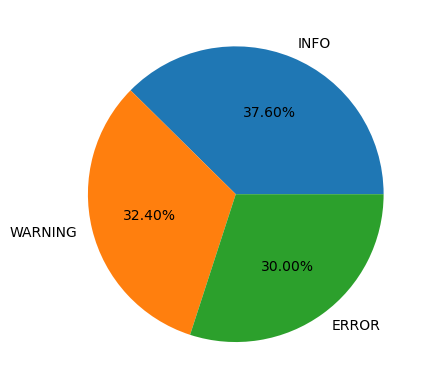

Wall time: 75.8 ms


In [210]:
%%time
with  open('system_file.txt','r') as f:

    status = ["INFO","WARNING","ERROR"]
    count = lambda file : all_status_count(file)

    plt.pie(count(f),labels=status,autopct="%.2f%%")
    plt.show()

In [211]:
def filter(log,status):

    line = log.readline()
    if line != '':
    
        g = filter(log,status) 

        if str(line).find(f"{status}") > 0:
            g.append(line.replace("\n", ""))
            return g
        return g

    return []
    



In [212]:
def clean(log,index=0):
    if index < len(log):
        cleaned = clean(log,index+1)
        cut_index = log[index].rfind("-")
        cleaned.append(log[index][cut_index+2:])
        return cleaned
    return []

In [213]:
def status_message_count(log):
    log.sort()
    counted = [(len(list(group)), key) for key, group in itertools.groupby(log)]
    return counted

In [214]:
def message_plot(log,status):
    filtered = filter(log,f"{status}")
    cleaned = clean(filtered)
    counted = status_message_count(cleaned)
    message, count = zip(*counted)
    print(message, count)

    fig,ax=plt.subplots()

    ax.barh(count,message)
    plt.title(status + " Message")
    plt.xlabel("Total number of message")
    plt.ylabel("Message")

(30, 35, 30, 36, 24, 30, 43, 40, 32) ('Application crashed unexpectedly.', 'Critical system error.', 'Database connection failed.', 'Database query failed.', 'File not found.', 'HTTP request failed with status code 404.', 'Permission denied for user.', 'Server crashed due to memory leak.', 'Server timeout occurred.')
(41, 31, 25, 36, 33, 32, 44, 34, 48) ('CPU temperature exceeding threshold.', 'Disk space running low.', 'Invalid input received.', 'Memory usage high.', 'Network connection unstable.', 'Resource limit exceeded.', 'Server overloaded.', 'Server response time exceeding threshold.', 'Software update available.')


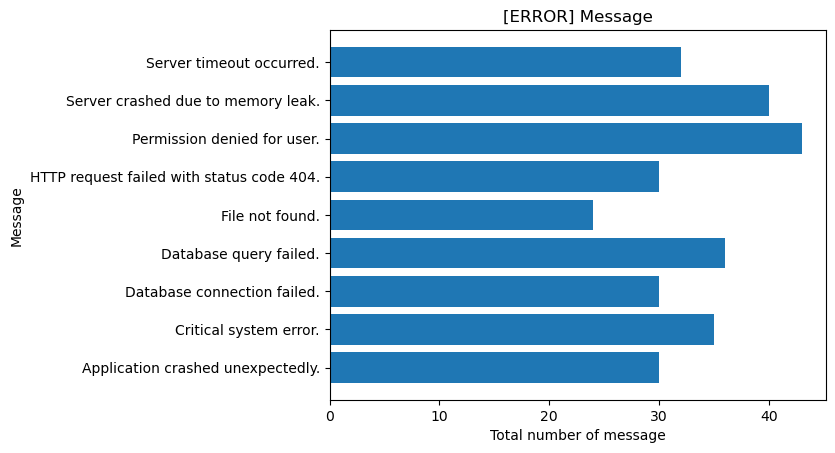

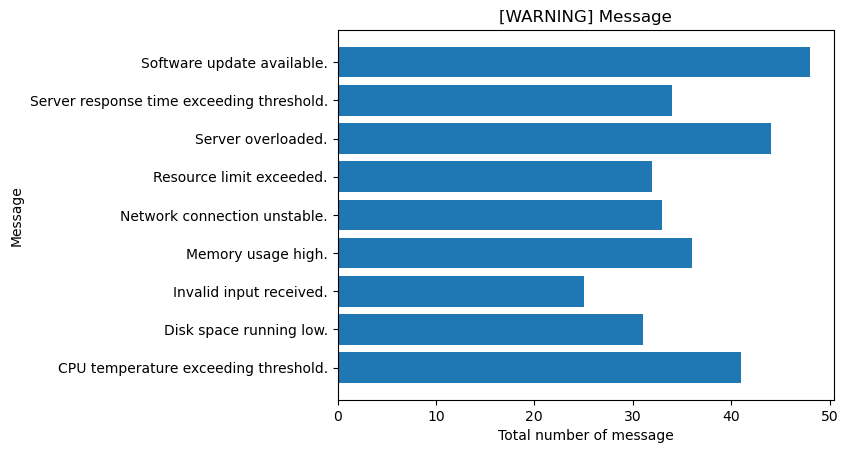

In [215]:
with  open('system_file.txt','r') as f:
    message_plot(f,"[ERROR]")

with  open('system_file.txt','r') as f:
    message_plot(f,"[WARNING]")
    

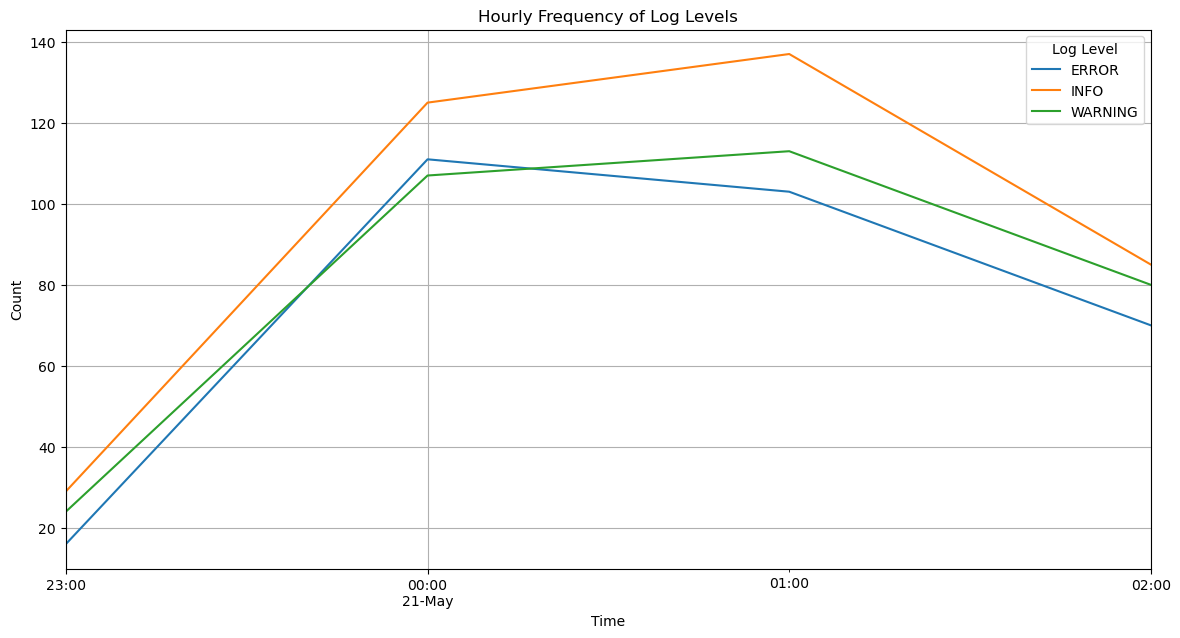

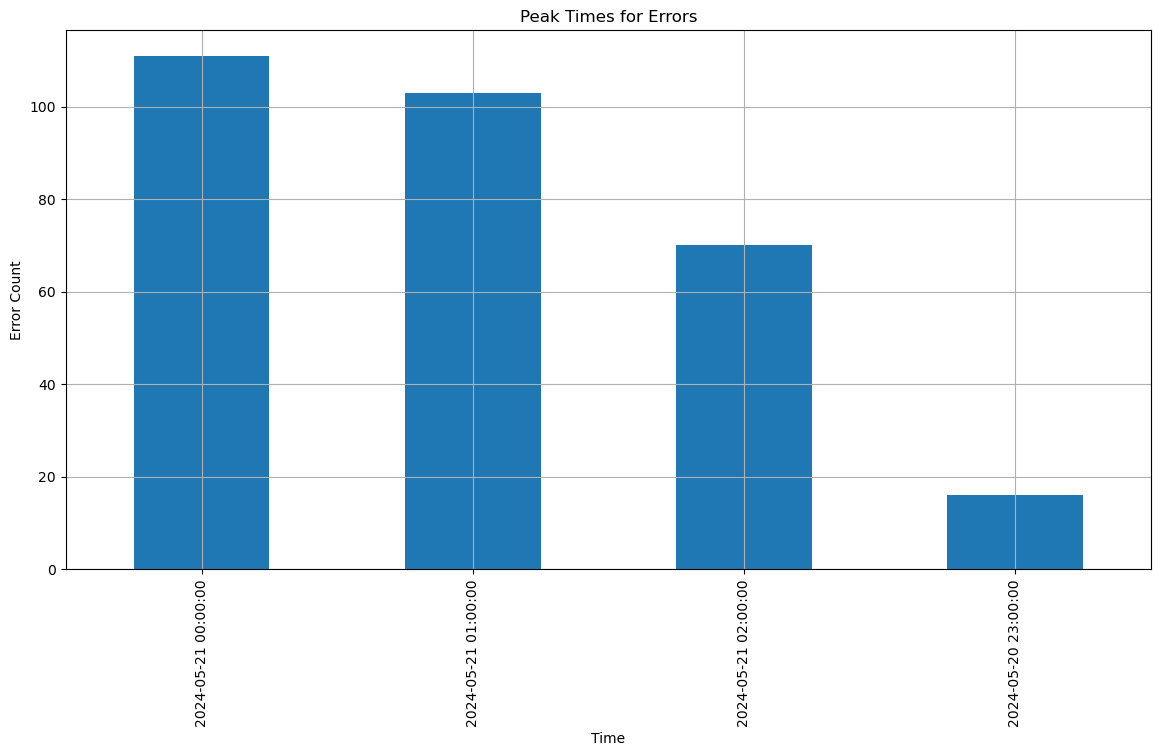

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to parse the log file and extract relevant data
def parse_log_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if ' - ' in line:
                timestamp, level, message = line.split(' - ', 2)
                data.append({'timestamp': timestamp, 'level': level.strip('[]'), 'message': message.strip()})
    return pd.DataFrame(data)

# Provide the correct path to your log file
file_path = 'system_file.txt'

# Parse the log file
log_df = parse_log_file(file_path)

# Convert timestamp to datetime
log_df['timestamp'] = pd.to_datetime(log_df['timestamp'])
log_df.set_index('timestamp', inplace=True)

# Plot Frequency Over Time (Hourly)
hourly_counts = log_df.resample('H').apply(lambda x: x['level'].value_counts()).unstack().fillna(0)
plt.figure(figsize=(14, 7))
hourly_counts.plot(kind='line', ax=plt.gca())
plt.title('Hourly Frequency of Log Levels')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(title='Log Level')
plt.grid(True)
plt.show()


# Identify Peak Times for Errors
error_peak_times = log_df[log_df['level'] == 'ERROR'].resample('H').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
error_peak_times.plot(kind='bar', ax=plt.gca())
plt.title('Peak Times for Errors')
plt.xlabel('Time')
plt.ylabel('Error Count')
plt.grid(True)
plt.show()




C:\Users\2204l\AppData\Local\Temp\ipykernel_20100\3604205806.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_activities['user'] = user_activities['message'].str.extract(r'(\w+) User logged')


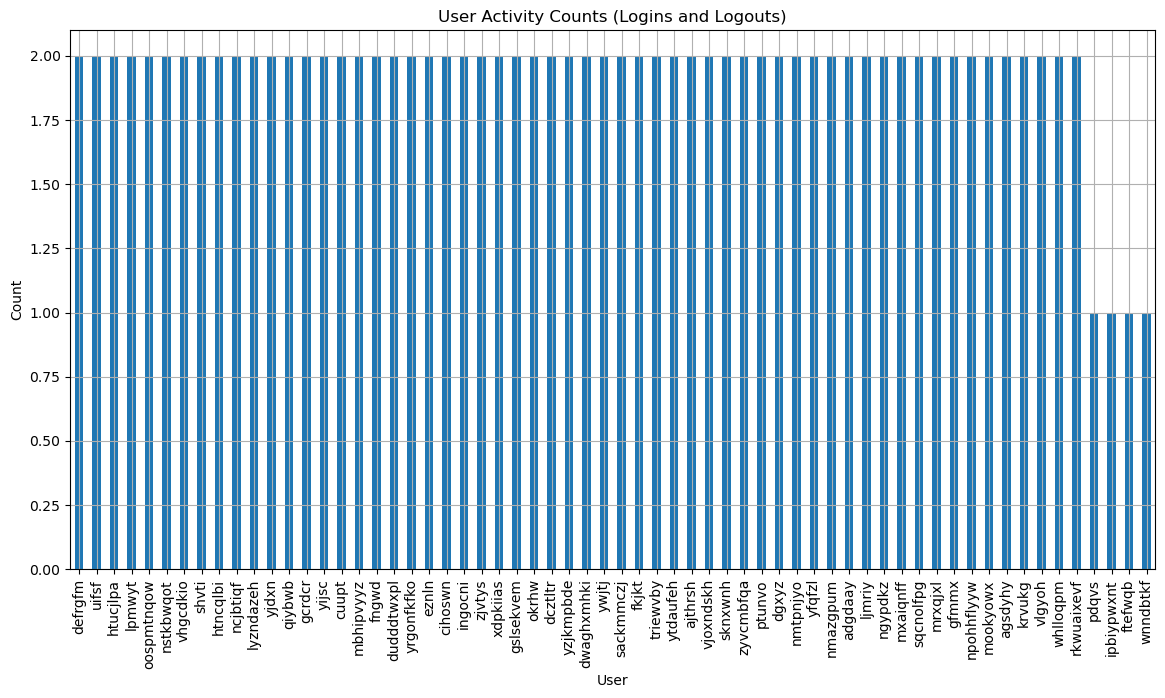

C:\Users\2204l\AppData\Local\Temp\ipykernel_20100\3604205806.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['user'] = errors['message'].str.extract(r'(\w+)')


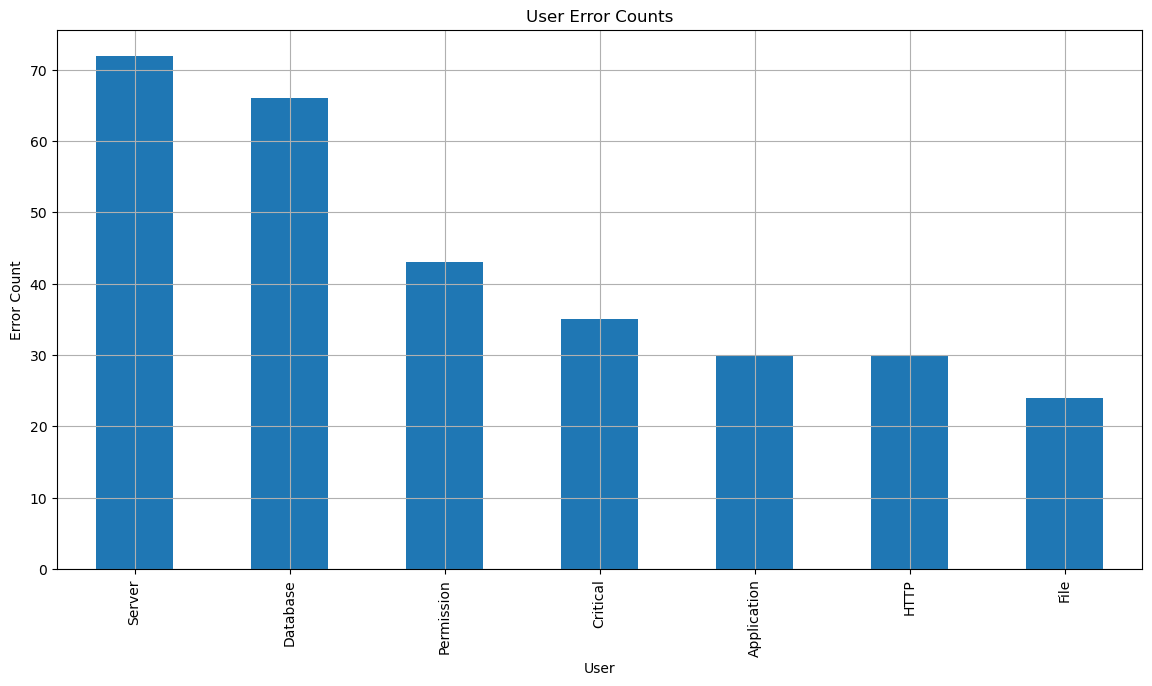

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to parse the log file and extract relevant data
def parse_log_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if ' - ' in line:
                timestamp, level, message = line.split(' - ', 2)
                data.append({'timestamp': timestamp, 'level': level.strip('[]'), 'message': message.strip()})
    return pd.DataFrame(data)

# Provide the correct path to your log file
file_path = 'system_file.txt'

# Parse the log file
log_df = parse_log_file(file_path)

# Convert timestamp to datetime
log_df['timestamp'] = pd.to_datetime(log_df['timestamp'])
log_df.set_index('timestamp', inplace=True)

# Analyze User Activities
user_activities = log_df[log_df['message'].str.contains('User logged in successfully|User logged out successfully')]
user_activities['user'] = user_activities['message'].str.extract(r'(\w+) User logged')

# User Activity Patterns
user_activity_counts = user_activities['user'].value_counts()
plt.figure(figsize=(14, 7))
user_activity_counts.plot(kind='bar')
plt.title('User Activity Counts (Logins and Logouts)')
plt.xlabel('User')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Identify Users with Frequent Errors
errors = log_df[log_df['level'] == 'ERROR']
errors['user'] = errors['message'].str.extract(r'(\w+)')
user_error_counts = errors['user'].value_counts()
plt.figure(figsize=(14, 7))
user_error_counts.plot(kind='bar')
plt.title('User Error Counts')
plt.xlabel('User')
plt.ylabel('Error Count')
plt.grid(True)
plt.show()

